<a href="https://colab.research.google.com/github/BautistaDavid/Proyectos_ClaseML/blob/main/Proyecto5_exploracion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [243]:
# !pip install squarify
# !pip install selenium

In [236]:
# These are all the modules used in this notebook. However, later we are going to re-import some specific modules to show you when they are used.
from folium import plugins
import folium
import geopy.distance 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import squarify as sq 


# **Exploring New York city Airbnb Data**

In [ ]:
abnb_data = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/Proyectos_ClaseML/main/data/AB_NYC_2019.csv')

## **¡A quick Look!**

**Let's check the first ten rows ...**

In [ ]:
abnb_data.head(10) 

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,mahal_distances,p_value,id,name,host_id,host_name,last_review
0,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0,2.079372,1.0,NaN,NaN,NaN,NaN,NaN
1,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,0.73,2,233,1.879199,1.0,NaN,NaN,NaN,NaN,NaN
2,Brooklyn,Bedford-Stuyvesant,40.68310,-73.95473,Private room,70,1,74,0.66,2,269,1.581265,1.0,NaN,NaN,NaN,NaN,NaN
3,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.00,1,365,2.572400,1.0,NaN,NaN,NaN,NaN,NaN
4,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,Entire home/apt,110,7,61,0.52,1,265,1.283528,1.0,NaN,NaN,NaN,NaN,NaN
5,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,0.10,1,0,0.660845,1.0,NaN,NaN,NaN,NaN,NaN
6,Brooklyn,Bedford-Stuyvesant,40.68043,-73.93934,Private room,80,1,112,1.01,3,251,2.390090,1.0,NaN,NaN,NaN,NaN,NaN
7,Brooklyn,Bedford-Stuyvesant,40.68413,-73.92357,Entire home/apt,125,7,139,1.23,2,311,2.990785,1.0,NaN,NaN,NaN,NaN,NaN
8,Brooklyn,Bedford-Stuyvesant,40.68296,-73.93662,Entire home/apt,125,3,227,2.09,2,163,4.990288,1.0,NaN,NaN,NaN,NaN,NaN
9,Brooklyn,Bedford-Stuyvesant,40.68281,-73.93524,Entire home/apt,115,3,124,1.72,2,170,2.393933,1.0,NaN,NaN,NaN,NaN,NaN


**Now the last ten ...**

In [ ]:
abnb_data.tail(10) 

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,mahal_distances,p_value,id,name,host_id,host_name,last_review
48072,Manhattan,Harlem,40.80953,-73.95410,Private room,60,1,0,NaN,1,26,NaN,NaN,36478357.0,"Cozy, Air-Conditioned Private Bedroom in Harlem",177932088.0,Joseph,NaN
48073,Brooklyn,Bushwick,40.70418,-73.91471,Private room,42,7,0,NaN,1,16,NaN,NaN,36479230.0,Studio sized room with beautiful light,65767720.0,Melanie,NaN
48074,Brooklyn,Williamsburg,40.71728,-73.94394,Entire home/apt,120,20,0,NaN,1,22,NaN,NaN,36480292.0,Gorgeous 1.5 Bdr with a private yard- Williams...,540335.0,Lee,NaN
48075,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NaN,1,15,NaN,NaN,36481615.0,"Peaceful space in Greenpoint, BK",274298453.0,Adrien,NaN
48076,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,NaN,1,31,NaN,NaN,36482231.0,Bushwick _ Myrtle-Wyckoff,66058896.0,Luisa,NaN
48077,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,1,341,NaN,NaN,36482783.0,Brooklyn Oasis in the heart of Williamsburg,274307600.0,Jonathan,NaN
48078,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,1,176,NaN,NaN,36483010.0,Comfy 1 Bedroom in Midtown East,274311461.0,Scott,NaN
48079,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,1,31,NaN,NaN,36484087.0,"Spacious Room w/ Private Rooftop, Central loca...",274321313.0,Kat,NaN
48080,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,1,27,NaN,NaN,36485431.0,Sunny Studio at Historical Neighborhood,23492952.0,Ilgar & Aysel,NaN
48081,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,1,23,NaN,NaN,36487245.0,Trendy duplex in the very heart of Hell's Kitchen,68119814.0,Christophe,NaN


**And what about the shape of the data?**

In [ ]:
abnb_data.shape   

(48082, 18)

**Also we can verify that all the columns names are in snake_case**

In [ ]:
abnb_data.columns    

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'mahal_distances', 'p_value', 'id', 'name',
       'host_id', 'host_name', 'last_review'],
      dtype='object')

**Now we can check what kind of data has every columns**

In [ ]:
abnb_data.dtypes   

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
mahal_distances                   float64
p_value                           float64
id                                float64
name                               object
host_id                           float64
host_name                          object
last_review                        object
dtype: object

**Is necessary to change the columns dtypes ?**

In [ ]:
for col in ['neighbourhood_group','room_type','neighbourhood']:  # We can change the data kind of some columns from 'object' to 'category'
  abnb_data[col] = abnb_data[col].astype('category')

abnb_data['host_id'] = abnb_data['host_id'].astype('object') 

abnb_data.drop(columns = ['host_name','name','id','last_review',], inplace = True) # Now we can drop some variables that are no usefull 

**Finally... Info about the data**

In [ ]:
abnb_data.info()  # Checking the info about the dataset we find that 'reviews_per_month' variables has missing values
# So now let's talk about this ... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48082 entries, 0 to 48081
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48082 non-null  category
 1   neighbourhood                   48082 non-null  category
 2   latitude                        48082 non-null  float64 
 3   longitude                       48082 non-null  float64 
 4   room_type                       48082 non-null  category
 5   price                           48082 non-null  int64   
 6   minimum_nights                  48082 non-null  int64   
 7   number_of_reviews               48082 non-null  int64   
 8   reviews_per_month               41130 non-null  float64 
 9   calculated_host_listings_count  48082 non-null  int64   
 10  availability_365                48082 non-null  int64   
 11  mahal_distances                 15779 non-null  float64 
 12  p_value           

## **Now we have some problems ... Missing values :(**

**Lets localizing the missing values**

In [ ]:
# # We are going to check the number of missing values in each column
# print('Number of Missing values by column\n ')
# for var in abnb_data.columns:
#   print(f'{var}: {abnb_data[var].isna().sum()}') 
# # abnb_data['price'].isna()

missing_info = pd.DataFrame()
cols = []
freq = []
for var in abnb_data.columns:
  cols.append(var)
  freq.append(abnb_data[var].isna().sum()) 

missing_info['column'] = cols
missing_info['missing_values'] = freq 
missing_info['percentage'] = missing_info['missing_values'] / len(abnb_data)

missing_info.set_index('column')


,missing_values,percentage
column,,
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000
reviews_per_month,6952,0.144586


Check it out. It looks like all the missing values ​​are in just one columns, ```reviews_per_month```, so probably all the rows with missing values ​​will only have one.

We can use a heatmap to take a look at missing values ​​more easily. 

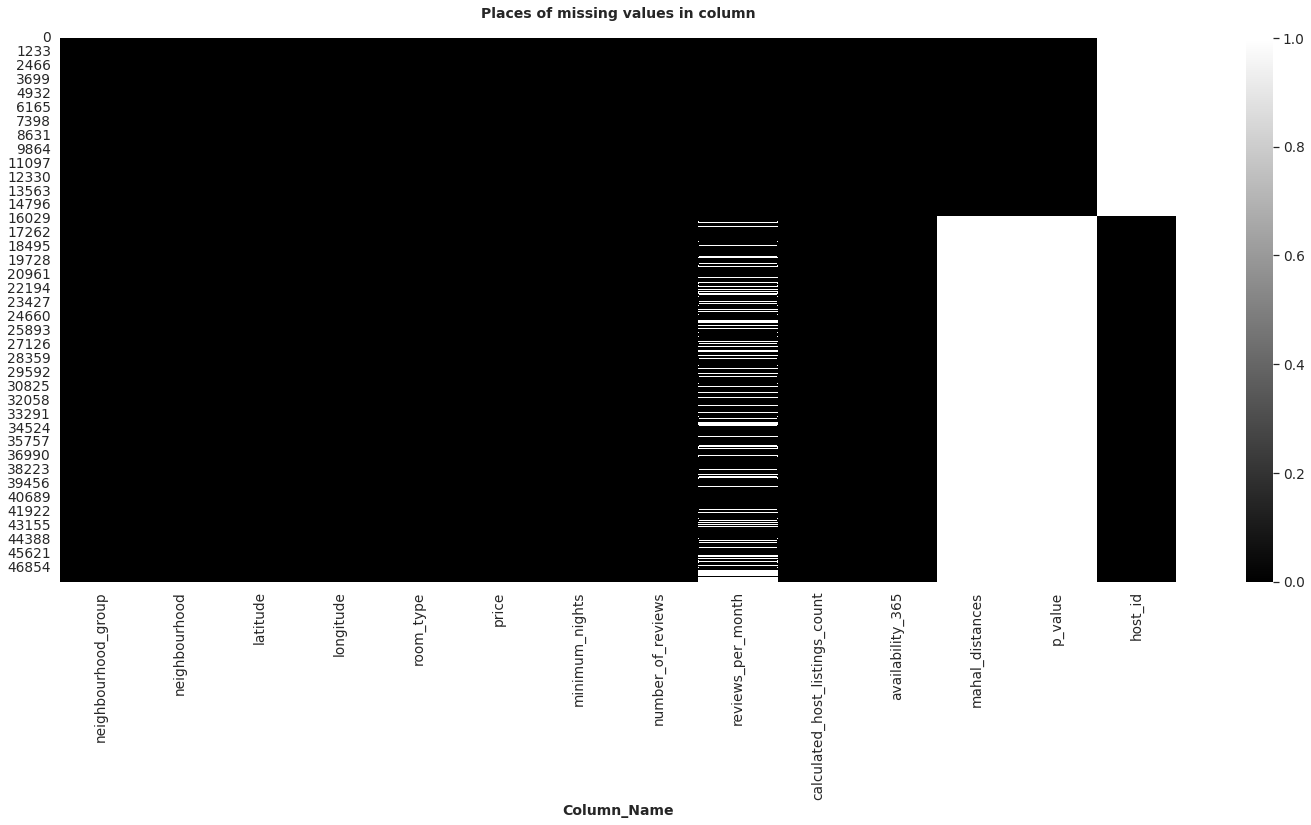

In [ ]:
plt.figure(figsize=(25, 10))
sns.heatmap(abnb_data.isnull(), cbar=True, cmap='gray')  # .isnull() is going to give you a DataFrame with True or False... and remeber that ( True = 1 , False = 0)  
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

**So, how do we solve that?**

Note that whenever there is a null value in the ```reviews_per_month``` column is because the value of ```number of review column``` is 0. So we can solve this problem replacing the null values by 0. Now when the value in ```reviews_per_month``` is 0 meanings that this airbnb hostel has 0 views per month.

In [ ]:
abnb_data['reviews_per_month'].replace({abnb_data.loc[2]['reviews_per_month']:0.0},inplace = True) # Replacing Null values with Zeros.

See how the rows that were changed look like now.

In [ ]:
abnb_data[abnb_data['number_of_reviews'] == 0].head()  

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,mahal_distances,p_value,host_id
3,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.0,1,365,2.572400,1.0,NaN
75,Brooklyn,Bedford-Stuyvesant,40.69407,-73.94551,Shared room,200,1,0,0.0,1,365,0.767412,1.0,NaN
79,Brooklyn,Bedford-Stuyvesant,40.68561,-73.92029,Private room,165,1,0,0.0,4,0,0.748200,1.0,NaN
108,Brooklyn,Bedford-Stuyvesant,40.69582,-73.94989,Private room,133,7,0,0.0,1,0,0.696506,1.0,NaN
133,Brooklyn,Bedford-Stuyvesant,40.69168,-73.93200,Private room,85,2,0,0.0,1,0,0.785904,1.0,NaN



## **What about the outliers?**

**First of all ... Univariate Analysis**

We can start by trying to identify univariate outliers in numerical columns

In [ ]:
abnb_numerical = abnb_data.select_dtypes(exclude = ['category','object']).drop(columns = ['calculated_host_listings_count', 'latitude','longitude'])   # Lets build a DataFrame with just numerical data. 
#computed_host_listings_count, latitude and longitude are columns of type int64 but isnot logical to try to determine an outlier for this columns considering what it means


**We can observaet descriptive statistic from the variables before try to identify outliers**

In [ ]:
abnb_numerical.describe()   

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,mahal_distances,p_value
count,48082.000000,48082.000000,48082.000000,41130.000000,48082.000000,15779.000000,15779.0
mean,152.360072,6.169398,25.203673,1.181660,95.327025,1.412239,1.0
std,253.409739,22.609387,47.317049,1.575686,124.529647,1.764419,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.076201,1.0
25%,70.000000,1.000000,1.000000,0.110000,0.000000,0.683977,1.0
50%,108.000000,2.000000,6.000000,0.500000,19.000000,0.808774,1.0
75%,175.000000,4.000000,26.000000,1.740000,179.000000,1.402366,1.0
max,10000.000000,1250.000000,629.000000,20.940000,365.000000,45.353902,1.0


**We can calculate an upper and lower bound to determinante outliers**

In [ ]:
def limits(serie):
  iqr = serie.quantile(q = 0.75) - serie.quantile(q = 0.25)
  return [serie.quantile(q = 0.75) + 1.5 * iqr, serie.quantile(q = 0.25) - 1.5 * iqr]

df_limites = pd.DataFrame()
for col in abnb_numerical.columns:
  df_limites[col] = limits(abnb_numerical[col])

df_limites['Limits'] = ['upper','lower']  
df_limites.set_index('Limits', inplace = True )
df_limites

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,mahal_distances,p_value
Limits,,,,,,,
upper,332.5,8.5,63.5,4.185,447.5,2.479950,1.0
lower,-87.5,-3.5,-36.5,-2.335,-268.5,-0.393607,1.0


let's look at some histograms after applying the lmiits constraints to the variables

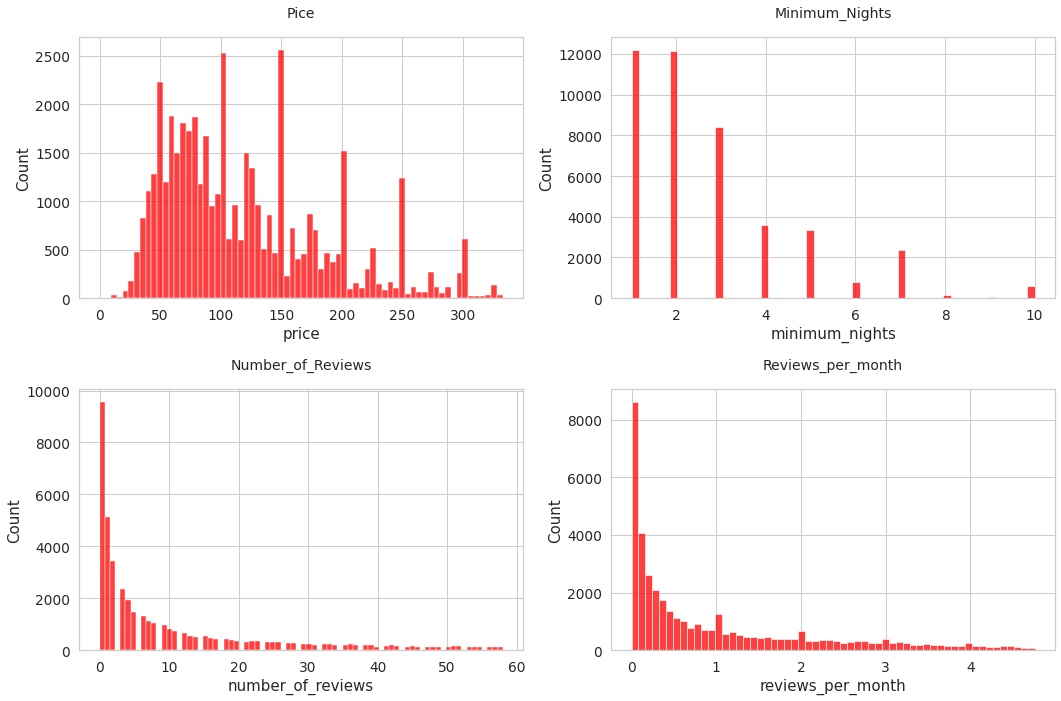

In [ ]:
import matplotlib.pyplot as plt

price = abnb_numerical[(abnb_numerical['price'] < 334.0)]['price']
minimum_nights = abnb_numerical[(abnb_numerical['minimum_nights'] < 11.0)]['minimum_nights']
number_of_reviews = abnb_numerical[(abnb_numerical['number_of_reviews'] < 58.5)]['number_of_reviews']
reviews_per_month	= abnb_numerical[(abnb_numerical['reviews_per_month'] < 4.765)]['reviews_per_month'] 

fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.histplot(price,color = 'red', ax = ax[0,0])
sns.histplot(minimum_nights, color = 'red', ax = ax[0,1])
sns.histplot(number_of_reviews, color = 'red', ax = ax[1,0])
sns.histplot(reviews_per_month, color = 'red', ax = ax[1,1])

ax[0,0].set_title('Pice',fontsize = 14)
ax[0,1].set_title('Minimum_Nights', fontsize = 14)
ax[1,0].set_title('Number_of_Reviews', fontsize = 14)
ax[1,1].set_title('Reviews_per_month', fontsize = 14)

fig.tight_layout()
plt.show()

 **however, if we want to apply any modification to the data is better to try analyzing the columns in a multivariable way** 

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
import numpy as np 

The Mahalanobis distance is the distance between two points in a multivariate space. It’s often used to find outliers in statistical analyses that involve several variables.

In [ ]:
mahal_distances = []

for row in abnb_numerical.to_numpy():
  mahal_distances.append(mahalanobis(row, abnb_numerical.mean(), np.linalg.inv(np.cov(abnb_numerical.values.T))))

k = abnb_data.shape[0]

abnb_data['mahal_distances'] = mahal_distances 
abnb_data['p_value'] = 1 - chi2.cdf(abnb_data['mahal_distances'], k-1)


In [ ]:
abnb_data = abnb_data[abnb_data['p_value'] >  0.05]

After applying the Mahalanobis distance to the data, the conclusion is that we cannot drop any rows. Perhaps the most interesting outliers were in the ```price``` column but we can discuss this later in relation to variables such location, room type and others.



## **Now... Let analyze duplicates**

There's two kind of duplicates, the first one is **explicit duplicates**, this happens when are row exactly equals. So we can use ```
drop_duplicates()``` from pandas to solve this.

In [ ]:
print(f'Data shape before use drop_duplicates() : {abnb_data.shape}')
abnb_data.drop_duplicates(inplace = True)
print(f'Data Shape after drop_duplicates() : {abnb_data.shape}')


Data shape before use drop_duplicates() : (0, 14)
Data Shape after drop_duplicates() : (0, 14)


The second type of duplicates are **implicit duplicates**, This happens when the values ​​​​of the columns are written differently but they are the same data. Some of the columns that this is able to happen is price, minimum nights ans number of reviews however we set the kind data in int64 so we dont have any problem.


In [ ]:
abnb_data.select_dtypes(include = 'int64').columns

Index(['price', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## **Let's talk for a second...Let's change the point of view**

There is a problem with this specific data, the column ```host_listings_count``` indicated the number of rows of a single host_id in all the data, that means maybe there is the same airbnb hostel more than once.

All this becomes a problem because the main idea of ​​our data visualization is to understand information about the total number of airbnbs but without them being repeated.

It is understood that this type of information where a record of several uses of the same hostel is kept is useful on some occasions, however in this case it would not be desirable. Since the latitudes and longitudes are not exactly the same, there is no accurate way of knowing that it is the same hostel. so we have to think of a solution by separating the hostels by a minimum distance

So we are going to propose a solution by creating a function that removes all airbnbs hostels that are within a shorter distance than the indicated.after that we will develop a data analysis. 


Let's rename the data, just to make the code easier :)

In [ ]:
data = abnb_data.drop(columns = ['mahal_distances','p_value','host_id'])

In [ ]:
import geopy.distance

def droping_duplicates_abnbs(distance):
  nbhds = list(data[data['calculated_host_listings_count'] != 1]['neighbourhood'].value_counts().index)
  final_data, cont = pd.DataFrame(columns = data.columns), 0
  print(f'Charging... It could take a minutes')
  for nbh in nbhds:
    cont +=1
    idx_lst = []
    dinamic_data = data[data['neighbourhood'] == nbh]
    locs =  [[lat,long] for (lat,long) in zip(dinamic_data['latitude'],dinamic_data['longitude'])]
    for idx,i in zip(list(dinamic_data.index),locs):
      for idx_,j in zip(list(dinamic_data.index),locs):
        if i == j:
          None
        else:
          coords_1, coords_2 = i,j
          vector_dst = geopy.distance.vincenty(coords_1, coords_2).m
          if vector_dst < distance:
            if idx_lst.count(idx) > 0:
              None
            else:
              idx_lst.append(idx_)
    final_data = pd.concat([final_data,dinamic_data.drop(idx_lst)])    
  print(f'Now the data is ready, emjoy it :)')
  return pd.concat([final_data,abnb_data[abnb_data['calculated_host_listings_count'] == 1]])

In [ ]:
# data = droping_duplicates_abnbs(100)
# data.reset_index(inplace = True)
# data.to_csv('abnb_data.csv')

## **Time for Data Visualization**

Next we are going to structure a data visualization divided into univariate, bivariate and multivariate visualization. However, before we can reapply the idea of the mahalanobis distance and univariate outliers to our data, since these are different because of the modification we just made.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/BautistaDavid/Proyectos_ClaseML/main/data/abnb_data.csv')
data.drop(columns = ['Unnamed: 0','index'], inplace = True)

data_numerical = data[['price',	'minimum_nights','number_of_reviews','reviews_per_month']]
mahal_distances = []
# data
for row in data_numerical.to_numpy():
  mahal_distances.append(mahalanobis(row, data_numerical.mean(), np.linalg.inv(np.cov(data_numerical.values.T))))

k = abnb_data.shape[0]

data['mahal_distances'] = mahal_distances 
data['p_value'] = 1 - chi2.cdf(data['mahal_distances'], k-1)
data = data[data['p_value'] >  0.05]  

In [ ]:
df_limites_ = pd.DataFrame()
for col in data_numerical.columns:
  df_limites_[col] = limits(data_numerical[col])

df_limites_['Limits'] = ['upper','lower']  
df_limites_.set_index('Limits',inplace = True )
df_limites_

# The mahalanobis distance and univariate outliers info are ready

,price,minimum_nights,number_of_reviews,reviews_per_month
Limits,,,,
upper,332.5,8.5,61.0,3.44
lower,-87.5,-3.5,-35.0,-2.00


The mahalanobis distance and univariate outliers info are ready. So we can continue.

#### **Univariate visualization**

**neighbourhood_group**

We can plot a bar graph to identify the most frequent neighborhood groups for airbnbs in new york. But keep in mind that these neighborhood groups have different sizes, so we can create a metric that gives us information about the number of airbnbs per kilometer in the different neighborhood groups.

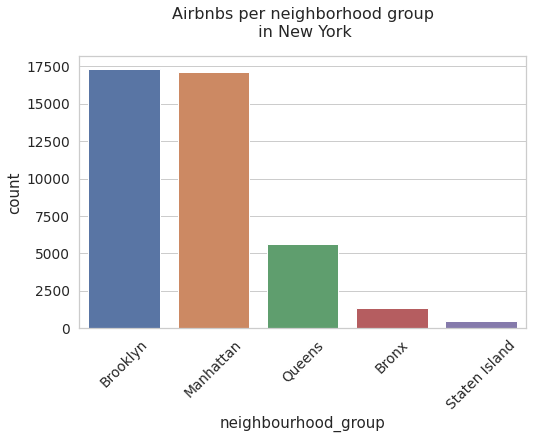

In [ ]:
from matplotlib import rcParams
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_plot = sns.countplot(x = 'neighbourhood_group' , data = data).set_title('Airbnbs per neighborhood group\n in New York',fontsize = 16) 

In [ ]:
freqs = data['neighbourhood_group'].value_counts()
index_abnb_per_km = pd.DataFrame({'neig_group':freqs.index, 'freq_abnbs':freqs,'km_2':[59,183,283,109,151]})
index_abnb_per_km['abnbs/km_2'] = index_abnb_per_km['freq_abnbs'] / index_abnb_per_km['km_2']
index_abnb_per_km

,neig_group,freq_abnbs,km_2,abnbs/km_2
Brooklyn,Brooklyn,17298,59,293.186441
Manhattan,Manhattan,17109,183,93.491803
Queens,Queens,5638,283,19.922261
Bronx,Bronx,1358,109,12.458716
Staten Island,Staten Island,459,151,3.039735


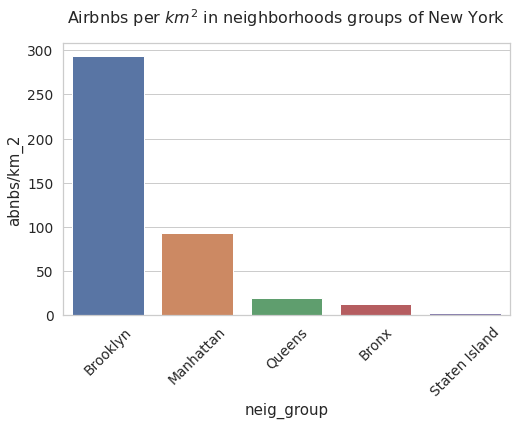

In [ ]:
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25)            # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_km_plot = sns.barplot(data = index_abnb_per_km, x = 'neig_group', y = 'abnbs/km_2').set_title(r'Airbnbs per $km^2$ in neighborhoods groups of New York',fontsize = 16) 

**neighbourhood**

Now we can plot a heat map above new york map to identify the principles neighbourhoods that has more airbnbs hostels than the others. If you are in github and you can't see the map, follow this [link](https://raw.githubusercontent.com/BautistaDavid/Proyectos_ClaseML/main/images/new_york_nbhds.png)

In [247]:
import folium
from folium import plugins
import matplotlib.pyplot as plt
import io
from PIL import Image

stationArr = data[['latitude', 'longitude']].to_numpy()

fol = folium.Map(location = [40.727, -74.097],zoom_start = 11 )
fol.add_children(plugins.HeatMap(stationArr, radius=14)) # ploting the heatmap

fol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  # Remove the CWD from sys.path while we load stuff.


**room tpye** 

Now we can see a countplot about room types categories in the data

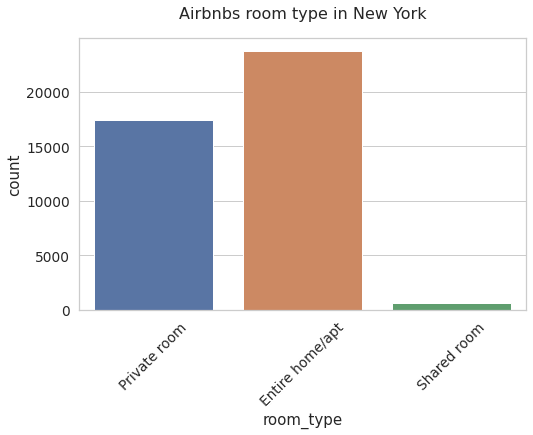

In [ ]:
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25) 
           # More Seaborn Style
rcParams['axes.titlepad'] = 20                          # set a space between  the title and the figure
plt.xticks(rotation=45)
neigh_plot = sns.countplot(x = 'room_type' , data = data).set_title('Airbnbs room type in New York',fontsize = 16) 

**price**

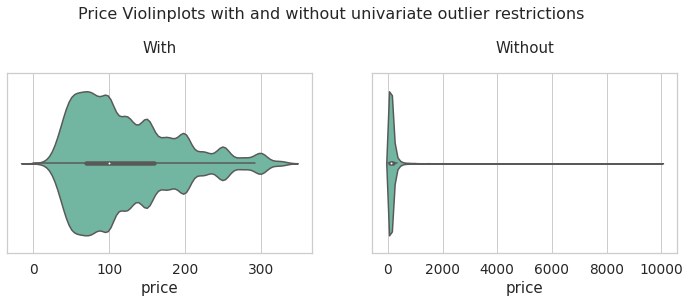

In [ ]:
price_data_univariate = data[data['price'] < df_limites_.loc['upper','price']]
fig, ax = plt.subplots(1,2,figsize = (12,4))
plt.subplots_adjust(top=0.75) 
fig.suptitle('Price Violinplots with and without univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = price_data_univariate, x = 'price',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.violinplot(data = data, x = 'price',ax = ax[1],palette="Set2").set_title('Without')


**minimum_nights**

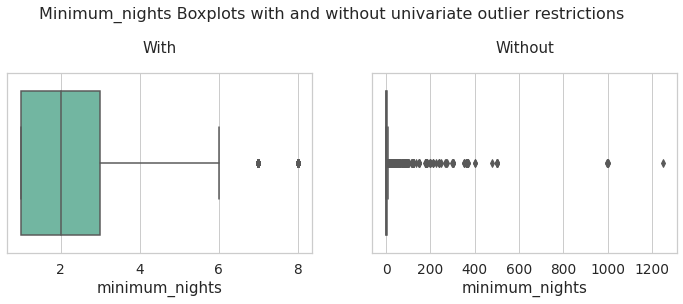

In [ ]:
minimum_nights_data_univariate = data[data['minimum_nights'] < df_limites_.loc['upper','minimum_nights']]
fig, ax = plt.subplots(1,2,figsize = (12,4))
plt.subplots_adjust(top=0.75) 
fig.suptitle('Minimum_nights Boxplots with and without univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.boxplot(data = minimum_nights_data_univariate, x = 'minimum_nights',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.boxplot(data = data, x = 'minimum_nights',ax = ax[1],palette="Set2").set_title('Without')

**number_of_reviews**

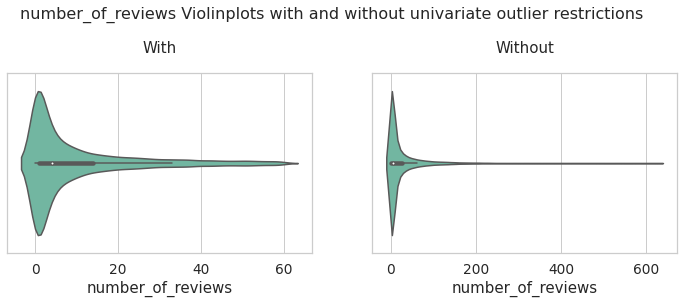

In [ ]:
number_of_reviews_data_univariate = data[data['number_of_reviews'] < df_limites_.loc['upper','number_of_reviews']]
fig, ax = plt.subplots(1,2,figsize = (12,4))
plt.subplots_adjust(top=0.75) 
fig.suptitle('number_of_reviews Violinplots with and without univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = number_of_reviews_data_univariate, x = 'number_of_reviews',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.violinplot(data = data, x = 'number_of_reviews',ax = ax[1],palette="Set2").set_title('Without')

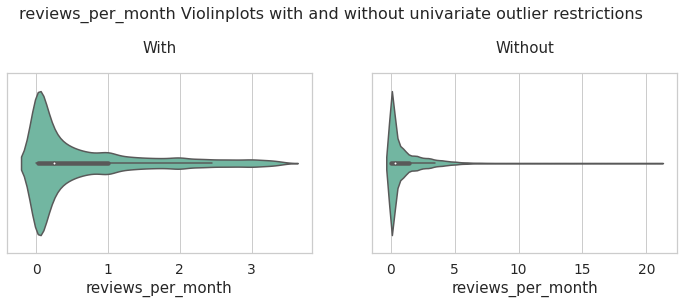

In [ ]:
reviews_per_month_data_univariate = data[data['reviews_per_month'] < df_limites_.loc['upper','reviews_per_month']]
fig, ax = plt.subplots(1,2,figsize = (12,4))
plt.subplots_adjust(top=0.75) 
fig.suptitle('reviews_per_month Violinplots with and without univariate outlier restrictions', fontsize=16)
sns.set_context("notebook", font_scale=1.25) 

with_ = sns.violinplot(data = reviews_per_month_data_univariate, x = 'reviews_per_month',ax = ax[0],palette="Set2").set_title('With')
without_ = sns.violinplot(data = data, x = 'reviews_per_month',ax = ax[1],palette="Set2").set_title('Without')


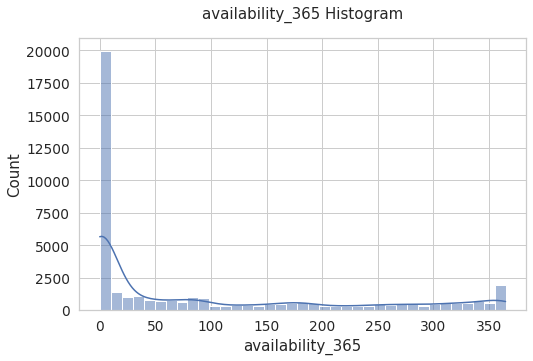

In [ ]:
plt.figure(figsize = (8,5))   # JUst for confugure a figure size 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})  # Seaborn Style
sns.set_context("notebook", font_scale=1.25) 
rcParams['axes.titlepad'] = 20   
# sns.displot(data['availability_365'])
aval = sns.histplot(data = data, x = 'availability_365',palette="Set2",kde = True).set_title('availability_365 Histogram')


### notas adicionales 

In [ ]:
import folium
from folium import plugins
import matplotlib.pyplot as plt
stationArr = data[['latitude', 'longitude']].to_numpy()

fol = folium.Map(location = [40.727, -74.097],zoom_start = 11 )
# plot heatmap
fol.add_children(plugins.HeatMap(stationArr, radius=15))
# fol

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  


In [ ]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
1,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,0.73,2,233
2,Brooklyn,Bedford-Stuyvesant,40.68310,-73.95473,Private room,70,1,74,0.66,2,269
3,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,0.00,1,365
4,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,Entire home/apt,110,7,61,0.52,1,265
...,...,...,...,...,...,...,...,...,...,...,...
41857,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,0.00,1,341
41858,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,0.00,1,176
41859,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,0.00,1,31
41860,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27


In [ ]:

fol = folium.Map(location = [data_test['latitude'][0],[data_test['longitude'][0]]],zoom_start = 12)
# for long,lat in zip(data_test['latitude'],data_test['longitude']):
  # folium.Marker(location = [long,lat]).add_to(fol)
# 

In [ ]:
# from scipy.spatial.distance import mahalanobis
# from scipy.stats import chi2
# import numpy as np 
# abnb_numerical = data[['price','minimum_nights','number_of_reviews','reviews_per_month']]
# mahal_distances = []

# for row in abnb_numerical.to_numpy():
#   mahal_distances.append(mahalanobis(row, abnb_numerical.mean(), np.linalg.inv(np.cov(abnb_numerical.values.T))))

# k = data.shape[0]

# data['mahal_distances'] = mahal_distances 
data['p_value'] = 1 - chi2.cdf(data['mahal_distances'], k-1)

In [248]:
# data2 = data[data['p_value'] >  0.05]
# data
[2,4]*2

[2, 4, 2, 4]

In [ ]:
import squarify as sq
def tree_map_neighs(n_neighs,district):
  neigh_data = pd.DataFrame({'freq':data[data['neighbourhood_group']==district]['neighbourhood'].value_counts()})
  neigh_data.reset_index(inplace = True)
  others_df = pd.DataFrame({'index':[f'Others'],'freq':[sum(neigh_data.loc[n_neighs + 1:len(neigh_data)]['freq'])]})
  neigh_data = pd.concat([neigh_data.loc[:n_neighs],others_df],axis = 0).reset_index().drop(columns = ['level_0'])
  
  fig, ax = plt.subplots(figsize=(17,11))
  sizes = neigh_data['freq']
  labels = neigh_data['index']
  colors = sns.color_palette('flare')[::-1]
  sq.plot(sizes=sizes, label=labels, color=colors, text_kwargs=dict(color='white', fontsize=15),)
  plt.axis('off')
  plt.title(f'Share of {district} neighborhoods in total airbnbs')
  plt.show()

  for district in data['neighbourhood_group'].value_counts().index:
  tree_map_neighs(25,district)
  print('     ')